## Análise Exploratória e Limpeza de Dados

Importação das bibliotecas necessárias:

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

Importação da base de dados:

In [140]:
data = pd.read_csv("https://drive.google.com/uc?id=1qquDhPBX3HjmNeAifNApkJSY3TaI7avq")

In [121]:
display(data)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


O dataset possui 247 informações e 13 features, além da target, *Classes*.

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


Podemos perceber que todas as variáveis estão armazenadas como objetos (strings). Esse não parece a maneira correta de tratar essas informações, então precisaremos corrigir isso posteriormente.

Além disso, podemos perceber que existem alguns dados ausentes no dataset.

Ainda podemmos reparar que os títulos das colunas *RH* e *WS* possuem um espaçamento lateral indesejado.

In [123]:
data.columns = data.columns.str.strip()

Como as variáveis estão sendo tratadas com objetos, o método describe não nos traz muita informação, mas é possível observar a quantidade de valores únicos em cada coluna:

In [124]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,127,9
top,1,7,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


Podemos observar que *Classes* apresenta 9 valores únicos (e não 2, como era esperado). Vamos averiguar isso melhor:

In [125]:
data["Classes"].value_counts(1).round(2)

,proportion
Classes,
fire,0.54
not fire,0.41
fire,0.02
fire,0.01
not fire,0.01
not fire,0.00
Classes,0.00
not fire,0.00
not fire,0.00


Podemos perceber diversos valores aparentemente repetidos, além de a presença errônea do valor "Classes" na coluna.

Vamos imprimir os valores únicos de todas as colunas:

In [126]:
for c in data.columns:
  print(c)
  print(data[c].unique())

day
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' nan 'Sidi-Bel Abbes Region Dataset' 'day']
month
['6' '7' '8' '9' nan 'month']
year
['2012' nan 'year']
Temperature
['29' '26' '25' '27' '31' '33' '30' '28' '32' '34' '35' '36' '37' '22'
 '24' nan 'Temperature' '38' '39' '40' '42']
RH
['57' '61' '82' '89' '77' '67' '54' '73' '88' '79' '65' '81' '84' '78'
 '80' '55' '62' '66' '64' '53' '47' '50' '68' '75' '76' '63' '69' '70'
 '59' '48' '45' '60' '51' '52' '58' '86' '74' '71' '49' nan ' RH' '44'
 '41' '42' '90' '87' '72' '46' '37' '36' '56' '43' '83' '29' '34' '33'
 '35' '39' '31' '21' '40' '24' '38' '26']
Ws
['18' '13' '22' '16' '14' '15' '12' '19' '21' '20' '17' '26' '11' nan
 ' Ws' '10' '9' '8' '6' '29']
Rain
['0' '1.3' '13.1' '2.5' '0.2' '1.2' '0.5' '3.1' '0.7' '0.6' '0.3' '0.1'
 '0.4' '1' '1.4' '0.8' '16.8' '7.2' '10.1' '3.8' '0.9' '1.8' '4.6' '8.3'
 '5.8' nan 'Rain ' '4' '2' '4.7' 

Além de perceber que todas as colunas aparentam ao mesmo um valor "estranho", correspondo ao nome da própria coluna, podemos notar que a repetição de valores na coluna *Classes* se deve à presença de espaços laterais.

Removendo a linha "estranha":

In [127]:
data[data['Classes'] == 'Classes  '].index

Index([124], dtype='int64')

In [128]:
data = data.drop(index = 124)

Removendo linhas com valores nulos:

In [129]:
data = data.dropna()

Removendo espaços laterais das strings da target:

In [130]:
data["Classes"] = data["Classes"].str.strip()

Como todas as observações do conjunto de dado ocorrem no ano de 2012, podemos remover a feature *year*:

In [131]:
data = data.drop("year", axis = 1)

Substituindo os valores da target para numéricos:

In [132]:
data["Classes"] = data["Classes"].replace({"fire": 1, "not fire": 0})

Podemos verificar que agora possuímos apenas 2 classes na target: 0 (sem incêndio) e 1 (incêndio):

In [133]:
data["Classes"].value_counts(1).round(2)

,proportion
Classes,
1,0.56
0,0.44


Em seguida, devemos alterar o datatype de nossas features para numérico:

In [134]:
data['day'] = data['day'].astype('int64')
data['month'] = data['month'].astype('int64')
data['Temperature'] = data['Temperature'].astype('int64')
data['RH'] = data['RH'].astype('int64')
data['Ws'] = data['Ws'].astype('int64')
data['Rain'] = data['Rain'].astype('float')
data['FFMC'] = data['FFMC'].astype('float')
data['DMC'] = data['DMC'].astype('float')
data['DC'] = data['DC'].astype('float')
data['ISI'] = data['ISI'].astype('float')
data['BUI'] = data['BUI'].astype('float')
data['FWI'] = data['FWI'].astype('float')

Chamando novamente o método info, podemos reparar que não só os datatypes estão corretos como também nos livramos do problema de dados ausentes:

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 246
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   Temperature  243 non-null    int64  
 3   RH           243 non-null    int64  
 4   Ws           243 non-null    int64  
 5   Rain         243 non-null    float64
 6   FFMC         243 non-null    float64
 7   DMC          243 non-null    float64
 8   DC           243 non-null    float64
 9   ISI          243 non-null    float64
 10  BUI          243 non-null    float64
 11  FWI          243 non-null    float64
 12  Classes      243 non-null    int64  
dtypes: float64(7), int64(6)
memory usage: 26.6 KB


### Visualização

Com os datasets limpos, podemos partir para visualização:

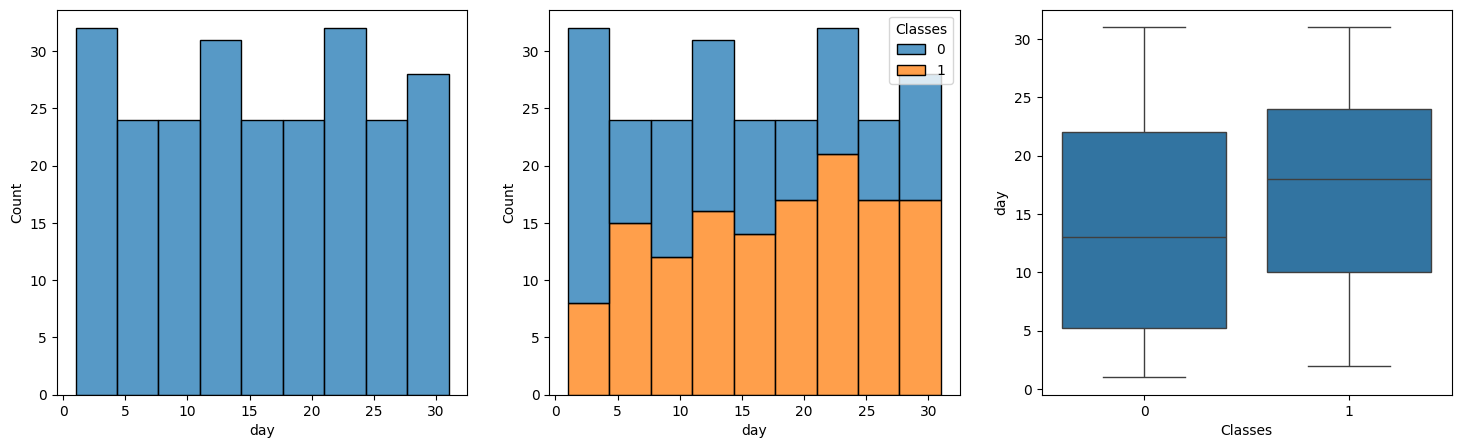

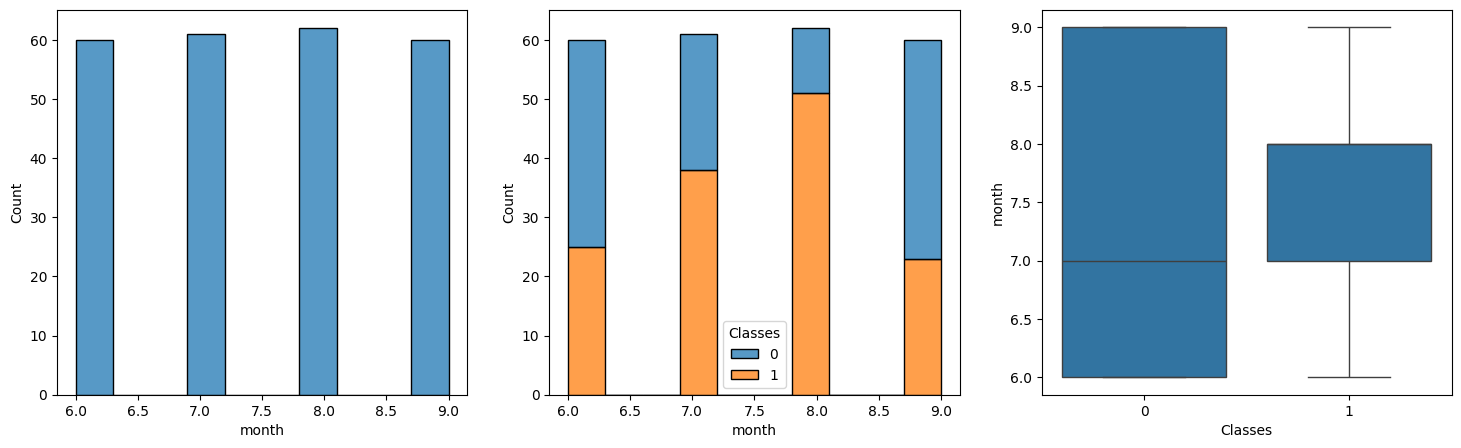

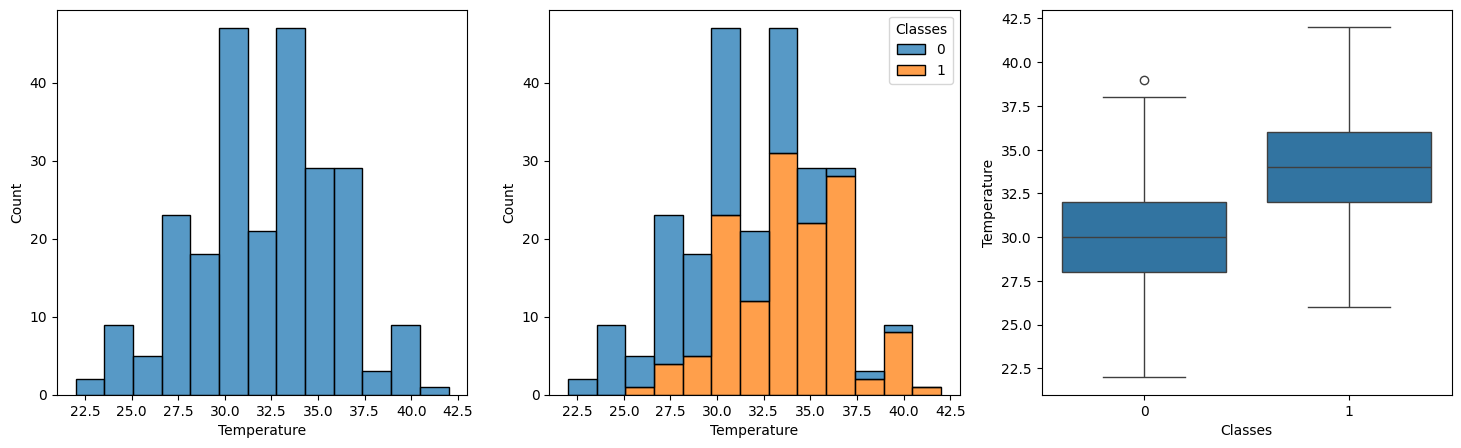

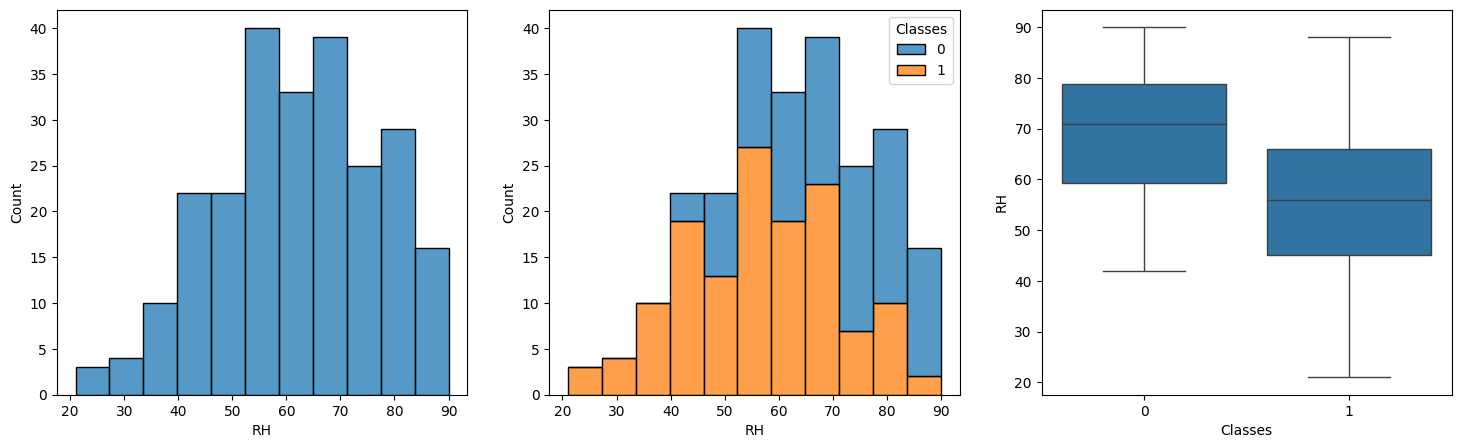

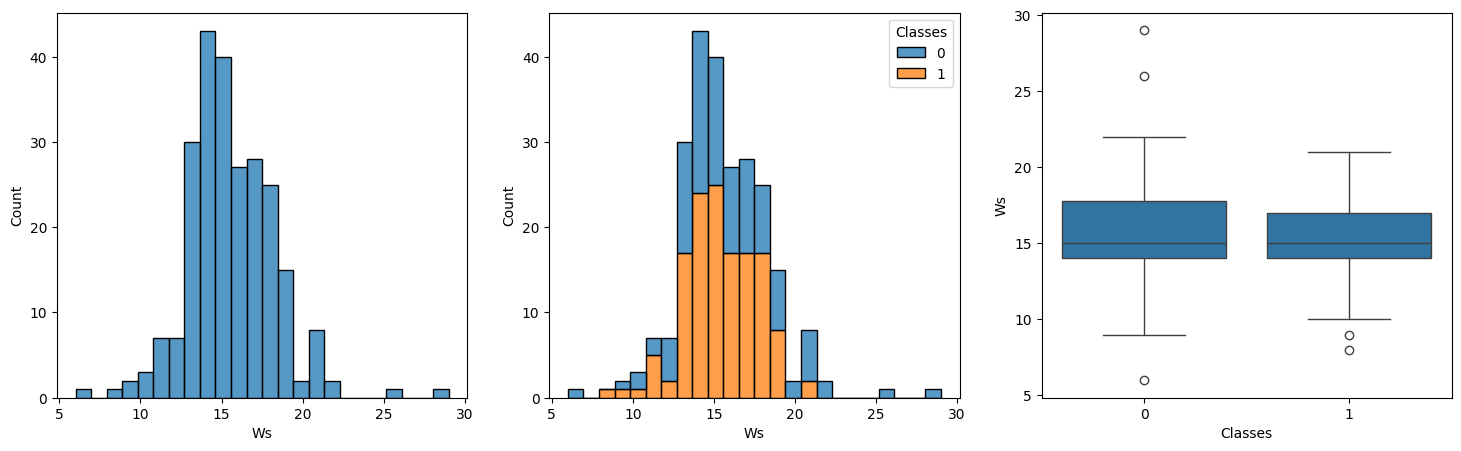

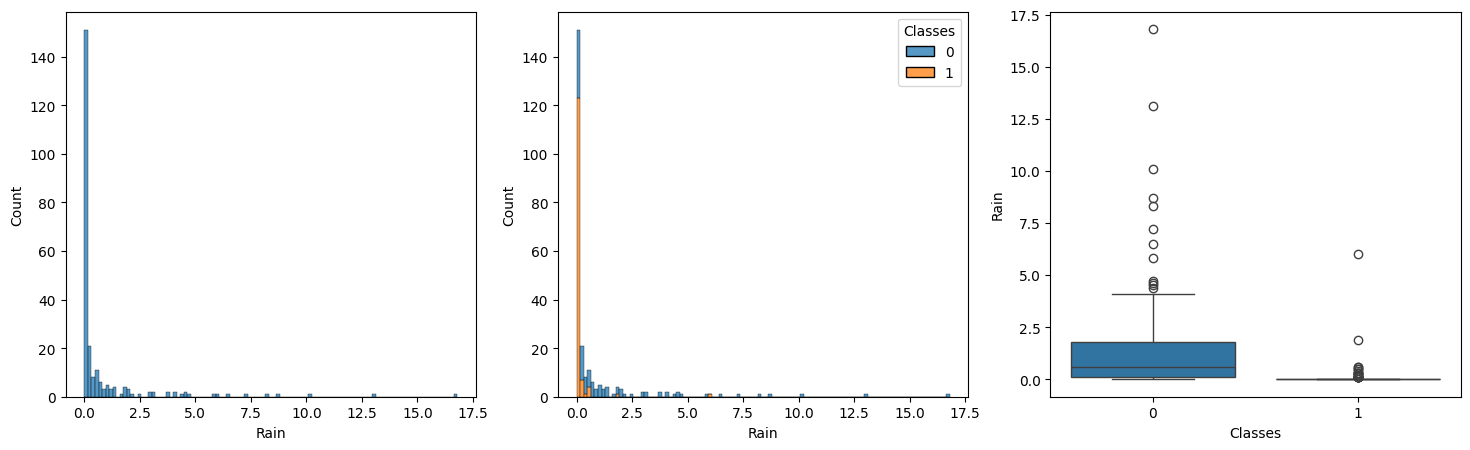

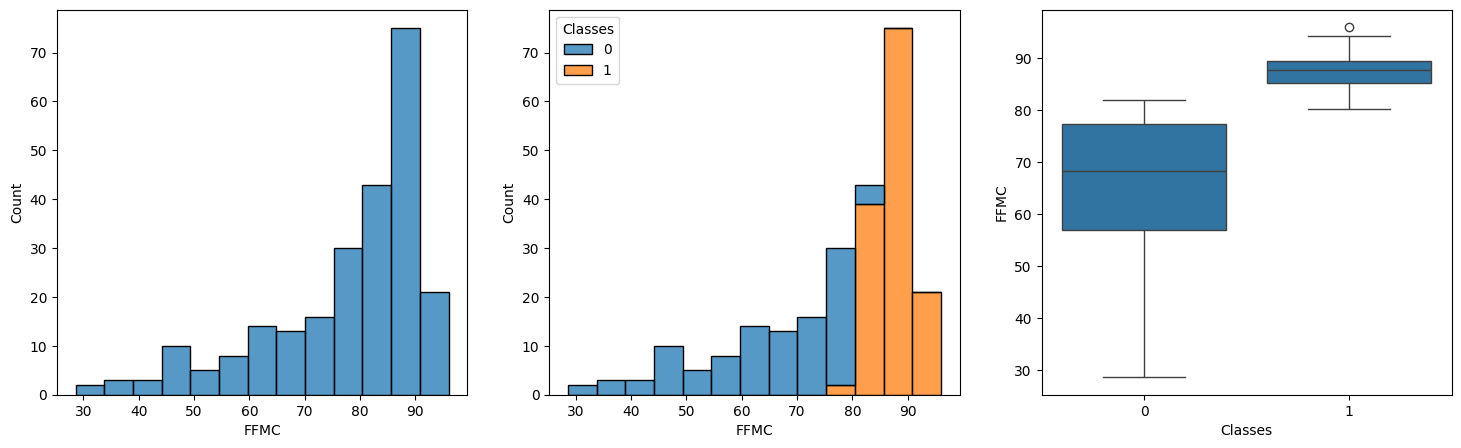

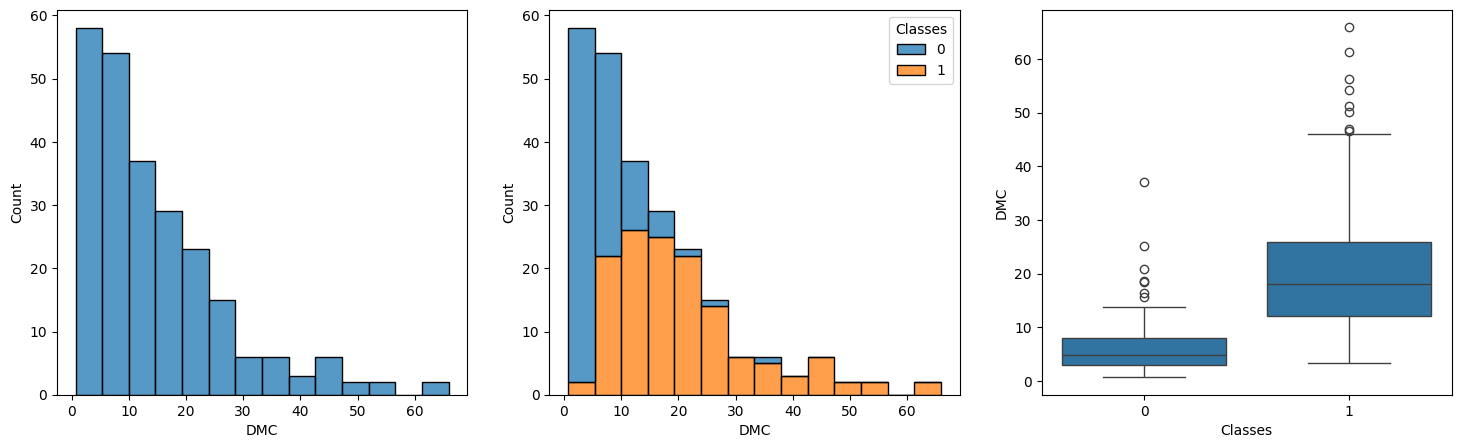

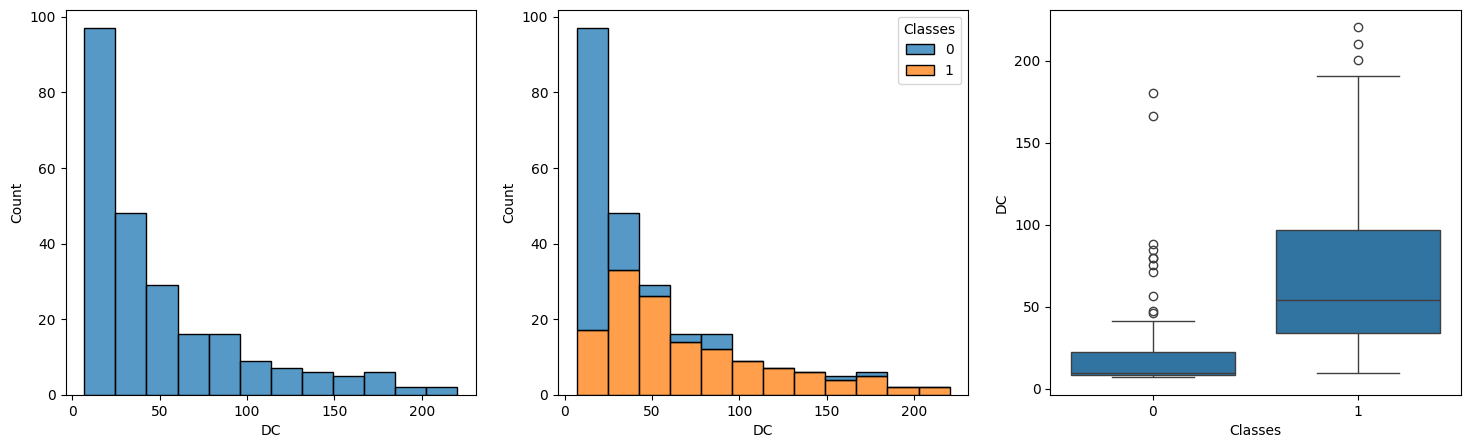

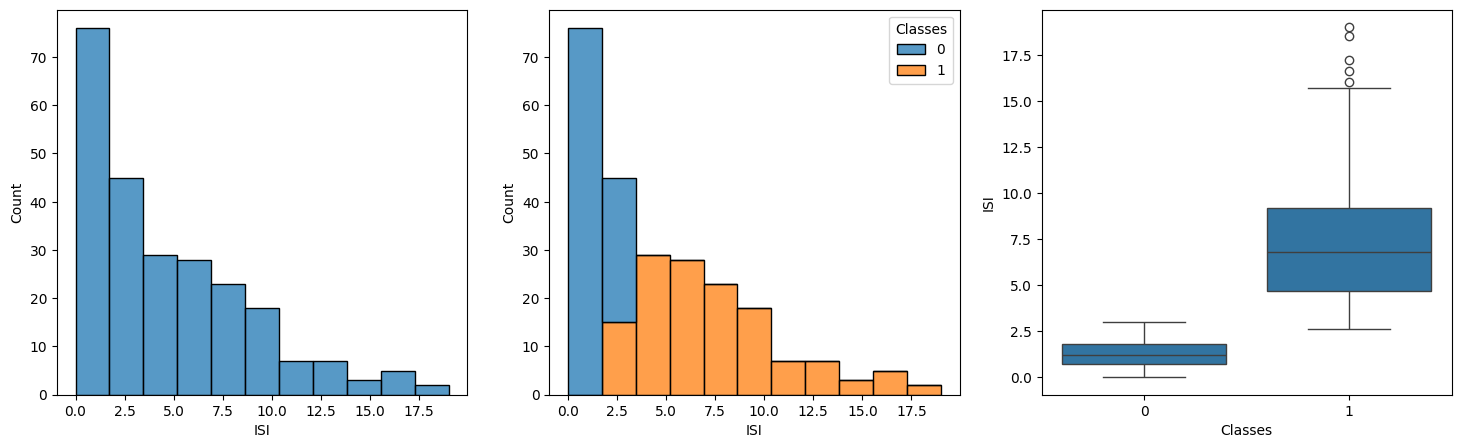

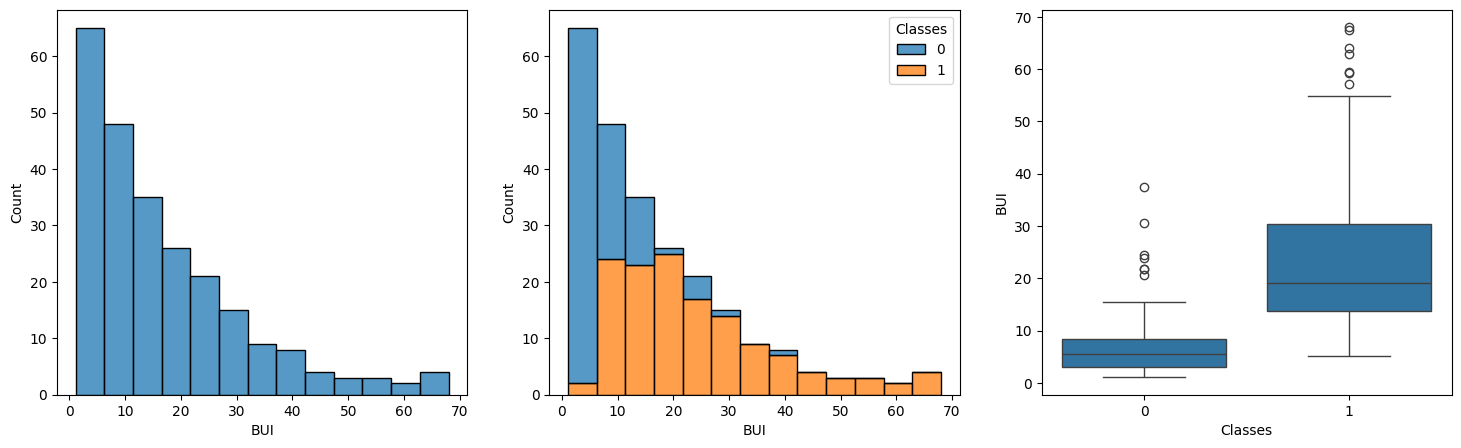

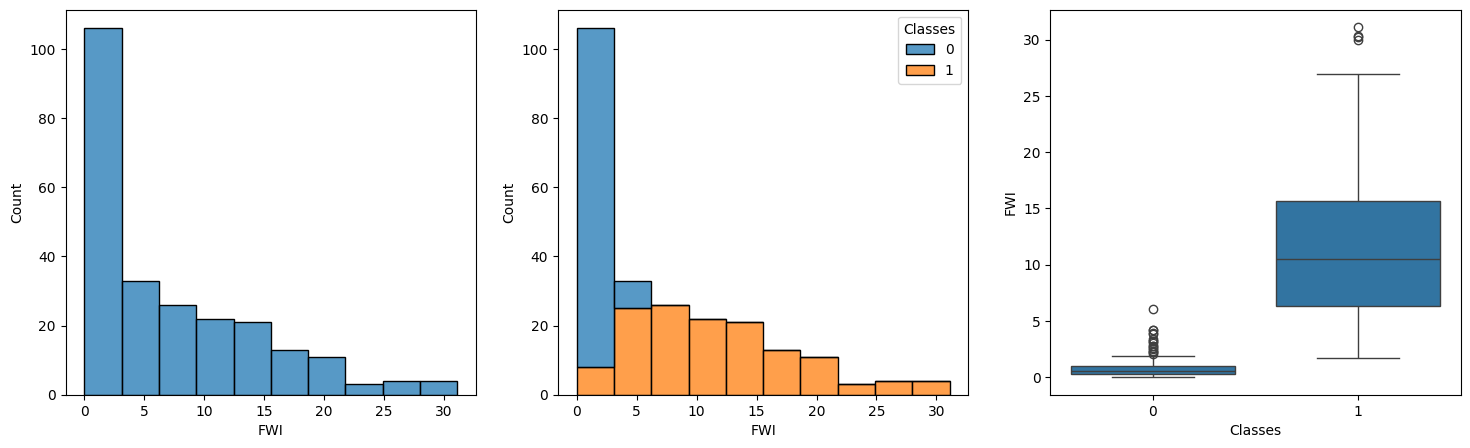

In [136]:
for c in data.columns:
  if c != "Classes":
    plt.figure(figsize = (18,5))
    plt.subplot(1,3,1)
    sns.histplot(data = data, x = c)
    plt.subplot(1,3,2)
    sns.histplot(data = data, x = c, hue = "Classes", multiple="stack")
    plt.subplot(1,3,3)
    sns.boxplot(data = data, y = c, x = "Classes")

Pelos gráficos, podemos constatar como diversas features possuem relações bem claras com a target. Podemos confirmar esse fato observando a matriz de correlação entre as features do dataset:

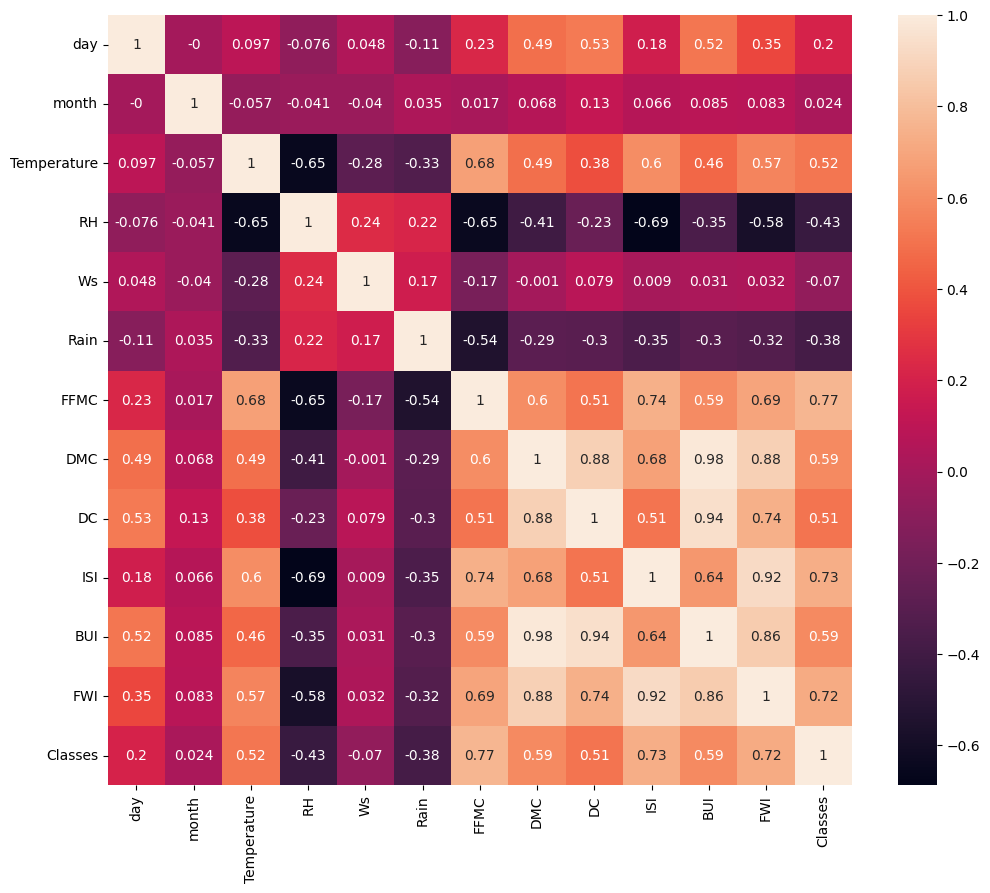

In [138]:
matrix = data.corr().round(3)
plt.figure(figsize=(12,10))
sns.heatmap(matrix, annot=True)
plt.show()

In [142]:
data.to_csv("forest_fires_clean.csv", index = False)